In [1]:
import pandas as pd
import glob
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [65]:
df = pd.read_csv('./data/avrRps4_tpm_fix.csv')

In [66]:
df = df.set_index('target_id')

In [67]:
df.head()

,SRR5712396,SRR5712382,SRR5712368,SRR5167846,SRR5167845,SRR5167844,SRR493236,SRR493235,SRR493101,SRR493098,...,SRR11934439,SRR11934428,SRR11934425,SRR11934420,SRR11934417,SRR11934414,SRR11934411,SRR11510196,SRR11510195,SRR11510194
target_id,,,,,,,,,,,,,,,,,,,,,
AT1G01010.1,0.456898,0.000000e+00,0.000000e+00,3.731860,4.03907,2.556860e+00,0.0,0.0000,3.39568,1.67921,...,50.807800,1.64129,1.249160,6.298350,32.328100,49.79520,57.3414,3.707170e+01,29.89980,31.03670
AT1G01020.2,0.000000,0.000000e+00,0.000000e+00,3.649300,1.80940,2.982680e+00,0.0,10.0058,7.07018,9.15856,...,7.214110,4.27980,5.724640,6.611880,9.954430,3.63662,11.8625,7.938920e+00,4.07529,9.96659
AT1G01020.6,3.652730,1.356780e+00,2.554010e+00,1.198010,1.08716,3.460240e+00,0.0,0.0000,1.98396,0.00000,...,0.000000,0.00000,0.000000,2.148700,2.155790,0.00000,0.0000,3.088900e+00,1.15016,2.77225
AT1G01020.1,0.000000,6.968100e-09,2.002420e-08,1.649540,1.27562,1.976860e+00,0.0,0.0000,4.59065,2.66098,...,0.000008,1.68311,0.768594,0.490111,0.000922,5.17104,1.3675,1.136940e+01,5.77062,4.06602
AT1G01020.4,0.000000,0.000000e+00,0.000000e+00,0.027649,0.00000,2.227110e-09,0.0,0.0000,0.00000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.581861,0.00000,0.0000,3.416470e-07,0.00000,0.00000


In [75]:
df_info = pd.read_csv('./data/avrRps4SampleInfo.csv')

In [76]:
m = []
for x in df_info.run:
    if x in df.columns:
        m.append(True)
    else:
        m.append(False)

In [77]:
Y = list(df_info.treatment[m])

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
X = df.T.values

In [79]:
fi_list = []
for x in range(100):
    rf  = RandomForestClassifier(n_estimators=5000, n_jobs=10)
    rf.fit(X,Y)
    fi = rf.feature_importances_ 
    fi_list.append(fi)

In [80]:
fi_fix = np.sum(np.stack(fi_list, axis=0),axis=0)

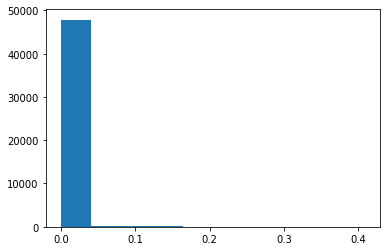

In [81]:
plt.hist(fi_fix)
plt.show()

In [70]:
cut = np.percentile(fi_fix[(fi_fix != 0 )],99)

In [71]:
m = fi_fix > cut

In [72]:
f = open('candidate_gene.txt', 'w')
for x in df[m].index:
    f.write(x + '\n')
f.close()

ValueError: Item wrong length 26713 instead of 48359.

In [74]:
df

,SRR5712396,SRR5712382,SRR5712368,SRR5167846,SRR5167845,SRR5167844,SRR493236,SRR493235,SRR493101,SRR493098,...,SRR11934439,SRR11934428,SRR11934425,SRR11934420,SRR11934417,SRR11934414,SRR11934411,SRR11510196,SRR11510195,SRR11510194
target_id,,,,,,,,,,,,,,,,,,,,,
AT1G01010.1,0.456898,0.000000e+00,0.000000e+00,3.731860,4.039070,2.556860e+00,0.00,0.0000,3.395680,1.67921,...,50.807800,1.641290,1.249160,6.298350,32.328100,49.795200,57.34140,3.707170e+01,29.899800,31.036700
AT1G01020.2,0.000000,0.000000e+00,0.000000e+00,3.649300,1.809400,2.982680e+00,0.00,10.0058,7.070180,9.15856,...,7.214110,4.279800,5.724640,6.611880,9.954430,3.636620,11.86250,7.938920e+00,4.075290,9.966590
AT1G01020.6,3.652730,1.356780e+00,2.554010e+00,1.198010,1.087160,3.460240e+00,0.00,0.0000,1.983960,0.00000,...,0.000000,0.000000,0.000000,2.148700,2.155790,0.000000,0.00000,3.088900e+00,1.150160,2.772250
AT1G01020.1,0.000000,6.968100e-09,2.002420e-08,1.649540,1.275620,1.976860e+00,0.00,0.0000,4.590650,2.66098,...,0.000008,1.683110,0.768594,0.490111,0.000922,5.171040,1.36750,1.136940e+01,5.770620,4.066020
AT1G01020.4,0.000000,0.000000e+00,0.000000e+00,0.027649,0.000000,2.227110e-09,0.00,0.0000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.581861,0.000000,0.00000,3.416470e-07,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG01350.1,2.846530,0.000000e+00,2.019600e+00,1.192310,0.757949,2.870200e-01,0.00,0.0000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.598350e+00,0.541510,0.217261
ATMG01360.1,12.771400,6.388780e+00,7.318700e+00,2.751880,2.903630,1.807810e+00,356.38,282.2730,0.730133,1.06194,...,1.373500,0.735222,2.417330,0.870595,2.796430,2.032950,2.26995,3.585610e+00,1.775450,1.949550
ATMG01370.1,114.214000,4.179180e+01,5.637200e+01,11.440100,6.082400,5.257490e+00,138.57,389.1320,7.381280,3.22072,...,11.749200,7.432710,5.430650,6.845430,6.057950,11.417800,8.45455,5.576720e+00,1.889360,3.411160
